### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# Tensorflow: gradient descent y tensorboard

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
import datetime

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\elda\anaconda3\lib\site-packages (20.1)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [6]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9828), started 1:16:41 ago. (Use '!kill 9828' to kill it.)

In [7]:
pip install jupyter-tensorboard

Note: you may need to restart the kernel to use updated packages.


In [8]:
a=np.load('C:/Users/Elda/OneDrive/Data Science/2 Trimestre/Statistical Learning I/proyecto_training_data.npy')
print(a)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


De las cinco variables, aquella con mayor potencial predictivo es la que corresponde a:

* Calidad de los materiales // train[:,1] // - correlación = 0.7940

Función de Costo:

<img src = "https://hackernoon.com/hn-images/0*DQ4rZdXEYzIf0iS_.png">

Actualización de los parámetros:

<img src = "https://hackernoon.com/hn-images/0*8yzvd7QZLn5T1XWg.jpg">

## Definiendo el grafo para la hipotesis:

In [15]:
def modelo_GD(x, y, lr, epochs):

    tf.reset_default_graph()
    g = tf.Graph()
    
    with g.as_default():

        muestra = len(x)

        tensor_x = tf.placeholder(tf.float32,[muestra],"tensor_x")
        tensor_y = tf.placeholder(tf.float32,[muestra],"tensor_y")


        m = tf.get_variable("pendiente", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
        b = tf.get_variable("intercepto", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())

        # hipotesis y = mx + b
        with tf.name_scope("Hipotesis"):
            y_hat = tf.add(tf.multiply(m, tensor_x), b)

        # funcion de costo
        with tf.name_scope("Costo"):
            costo = tf.reduce_sum(tf.pow(y_hat - tensor_y, 2)) / (2 * muestra)
            scalar_costo = tf.summary.scalar('Scalar Modelo GD', costo)

        # gradiente
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [m,b])

        # actualizacion de parametros
        with tf.name_scope("Parametros"):
            m_actual = m.assign(m - lr*gradiente[0] )
            b_actual = b.assign(b - lr*gradiente[1] )
            parametros_actual = tf.group(m_actual, b_actual)
    
    
        # batch gradient descent - uso de todo el dataset

        plt.scatter(x, y)

        with tf.train.MonitoredSession() as session:
            
            writer = tf.summary.FileWriter(('./Graphs'+str(lr)), session.graph)
            
            feed_dict = {tensor_x: x, tensor_y: y}

            for i in range(epochs+1):
                print("Gradiente del error respecto de m y b:")
                print(session.run(gradiente, feed_dict=feed_dict))

                session.run(parametros_actual,feed_dict=feed_dict)
                sc = session.run(scalar_costo,feed_dict=feed_dict)
                writer.add_summary(sc, epochs+1)

                predicciones = session.run(y_hat,feed_dict=feed_dict)
    
                print("Costo:")
                print(session.run(costo,feed_dict=feed_dict))
    
                plt.plot(a[ :, 1],predicciones,label=str(i))

        plt.legend()
        plt.show()
    
    return(parametros_actual)
    
    


INFO:tensorflow:Summary name Scalar Modelo GD is illegal; using Scalar_Modelo_GD instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Gradiente del error respecto de m y b:
[-1190339.5, -180921.19]
Costo:
7927191600.0
Gradiente del error respecto de m y b:
[-713727.3, -106509.42]
Costo:
3762834400.0
Gradiente del error respecto de m y b:
[-428070.78, -61911.85]
Costo:
2266777600.0
Gradiente del error respecto de m y b:
[-256863.28, -35183.36]
Costo:
1729216400.0
Gradiente del error respecto de m y b:
[-154250.28, -19164.617]
Costo:
1535964500.0
Gradiente del error respecto de m y b:
[-92749.51, -9564.773]
Costo:
1466394100.0
Gradiente del error respecto de m y b:
[-55889.03, -3812.0474]
Costo:
1441252400.0
Gradiente del error respecto de m y b:
[-33796.6, -365.07285]
Costo:
1432070400.0
Gradiente del error respecto de m y b:
[-20555.406, 1699.9487]
Costo:
1428621700.0
Gradiente del error respecto de m y b:
[-12

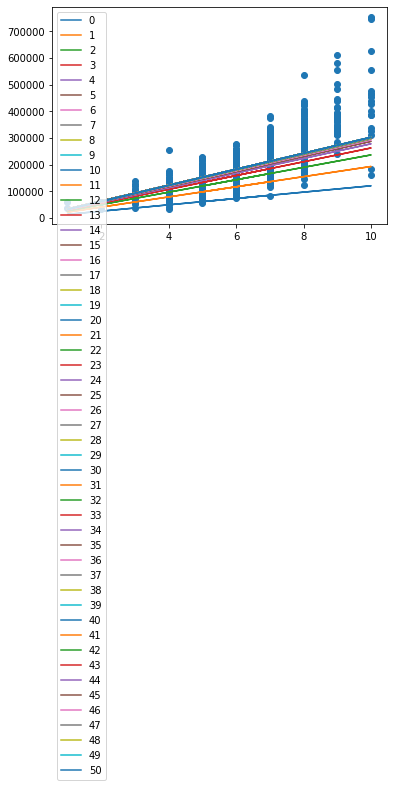

<tf.Operation 'Parametros/group_deps' type=NoOp>

In [16]:
modelo_GD(a[:, 1], a[:, 0], 0.01, 50)

In [ ]:
len(a[:,0])

## Sesion

In [ ]:
x = a[:, 1]
y = a[:, 0]
lr = 0.01
epochs = 50
muestra = len(x)

In [ ]:
tf.reset_default_graph()

tensor_x = tf.placeholder(tf.float32,[muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[muestra],"tensor_y")


m = tf.get_variable("pendiente", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())

# hipotesis y = mx + b
y_hat = tf.add(tf.multiply(m, tensor_x), b)

# funcion de costo
costo = tf.reduce_sum(tf.pow(y_hat - tensor_y, 2)) / (2 * muestra)

# gradiente
gradiente = tf.gradients(costo, [m,b])

# actualizacion de parametros
m_actual = m.assign(m - lr*gradiente[0] )
b_actual = b.assign(b - lr*gradiente[1] )
parametros_actual = tf.group(m_actual, b_actual)
    
    


In [ ]:
# batch gradient descent - uso de todo el dataset

plt.scatter(x, y)

with tf.train.MonitoredSession() as session:
    feed_dict = {tensor_x: x, tensor_y: y}

    for i in range(epochs+1):
        print("Gradiente del error respecto de m y b:")
        print(session.run(gradiente, feed_dict=feed_dict))

        session.run(parametros_actual,feed_dict=feed_dict)

        predicciones = session.run(y_hat,feed_dict=feed_dict)
    
        print("Costo:")
        print(session.run(costo,feed_dict=feed_dict))
    
        plt.plot(a[ :, 1],predicciones,label=str(i))

plt.legend()
plt.show()
    